<a href="https://colab.research.google.com/github/Aleksey128/Numpy_solutions.ipynb/blob/main/COCO_COLA_%D0%9A%D0%BB%D0%B8%D0%BC%D0%BE%D0%B2_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение. Постановка целей и задач.

Целью исследования является разработка точной модели прогнозирования временного ряда цены акций компании Coca-Cola на момент закрытия торгов.

Цель исследования - дать представление о будущем поведении переменной 'Close', что может помочь в принятии обоснованных решений, связанных с инвестированием в данную компанию. Предсказание будущей цены акций может помочь инвесторам в принятии решений о покупке, продаже или удержании акций, основываясь на представлении о том, какие изменения могут произойти в будущем на рынке. Таким образом, разработка точной модели прогнозирования временного ряда цены акций является важной задачей для тех, кто занят инвестиционной деятельностью, а также для компаний, которые хотят привлечь новых инвесторов.


---


Задачи:

*   Предварительно обработать набор данных и убедиться, что он подходит для анализа временных рядов.

*   Выявить закономерности и тенденции в переменной 'Close', используя методы анализа данных.

*   Оценить стационарность переменной 'Close' и применить соответствующие методы, такие как сезонное разложение и построение графиков автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF).

*   Определить и применить подходящие модели прогнозирования временных рядов для переменных 'Close', включая ARIMA, SARIMA и модель Хольта-Винтерса.

*   Обучить и проверить выбранные модели на наборе данных и оценить их эффективность с помощью соответствующих оценочных показателей, таких как средняя абсолютная ошибка в процентах (MAPE), среднеквадратичная ошибка (MSE) и корень из среднего квадрата ошибки(RMSE).

*   Представить выводы и рекомендации на основе результатов исследования, которые могут помочь в улучшении инвестиционных стратегий и принятии обоснованных решений.

**Импорт библиотек**

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

**Загрузка датасета и знакомство с ним**

In [ ]:
#Чтение файла
df =  pd.read_csv('COCO COLA.csv', index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


В этом наборе данных 15096 строк и 7 столбцов:


1.  Date - дата

1.   Open - цена открытия

1.   High - максимальная цена

1.   Low - минимальная цена

1.   Close - цена закрытия

2.   Adj Close - скоректированная цена закрытия

1.   Volume - количкство










Далее мы познакомимся с данными с помощью различных функций. 

Функция **shape** позволит нам увидеть размеры данных (количество строк и столбцов).

Функция **columns** отобразит названия столбцов в наборе данных. 

Функция **info** покажет типы данных каждого столбца и количество ненулевых значений.

Функция **describe** предоставит нам статистическую информацию, такую как среднее значение, стандартное отклонение, минимальное, максимальное и квартильное значения каждого столбца.

Понимая данные, мы можем принимать обоснованные решения о том, какие алгоритмы машинного обучения использовать и как предварительно обработать данные.

In [ ]:
#Количество строк и столбцов
df.shape

(15096, 6)

In [ ]:
#Названия столцов
#Стоит обратить внимание что сюда не попал столбец 'Date' т.к. он установлен в качестве индекса при считывании файла
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [ ]:
#Описательная статистика
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


**Очистка данных**

После первого знакомства с данными мы можем продолжить предварительную обработку данных и оценить необходимость дополнительной очистки и фильтрации. Это может включать такие методы, как интерполяция недостающих значений, удаление выбросов или масштабирование данных для подготовки их к моделированию. Убедившись, что данные имеют подходящий формат и качество для анализа, мы можем повысить точность и надежность получаемых моделей.

In [ ]:
#Количество отсутствующих и нулевых значений
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Процент отсутствующих и нулевых значений
df.isnull().mean() * 100

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Нулевых и пропущеных значений нет

**Вывод**

После первоначального изучения данных мы обнаружили, что набор данных содержит 7 столбцов и 15096 строк с информацией о ценах на акции Coca-Cola, дате и количестве проданных акций. Мы также изучили типы данных каждого столбца, количество и процент пропущенных значений, а также статистическое распределение каждого столбца с помощью функции describe().

Мы обнаружили, что в наборе данных нет пропущенных или нулевых значений, поэтому мы можем продолжить анализ данных без необходимости их дополнительной очистки.

В целом, первоначальное знакомство с данными позволило нам получить более глубокое понимание набора данных, что поможет нам в дальнейшем проводить анализ и принимать решения.

# EDA или разведочный анализ данных.

**Разделение датасета на тренировочную и тестовую (валидационную) выборки, проверка на статичность, построение графиков автокорреляции и частичной автокорреляции, разбивка на сезонность и тренд.**

[]

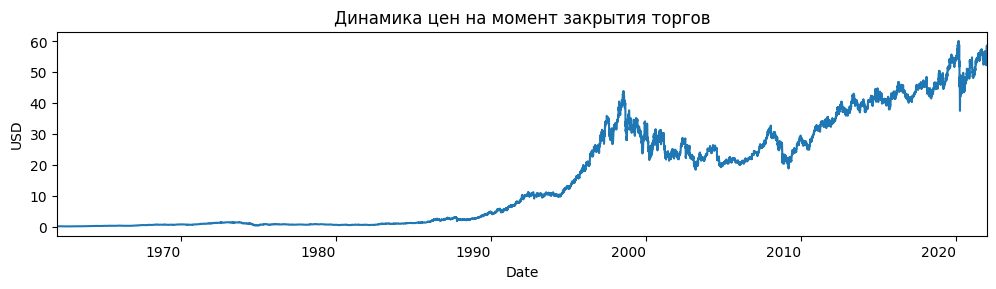

In [ ]:
#Построение графика динамики цен на момент закрытия торгов
ax_Demand = df['Close'].plot(figsize=(12,3), title='Динамика цен на момент закрытия торгов')
ax_Demand.autoscale(axis='x', tight = True)

plt.xticks(rotation=0)
_=plt.ylabel('USD')
plt.plot()

На графике показана историческая тенденция изменения цен на акции Coca-Cola с течением времени. Он показывает, что общая тенденция является восходящей, что свидетельствует о том, что цена акций в целом росла с течением времени. Однако существуют также периоды волатильности и колебаний цены акций. В целом, график дает ценную информацию об исторических показателях акций Coca-Cola, которая может помочь в принятии инвестиционных решений и стратегий.

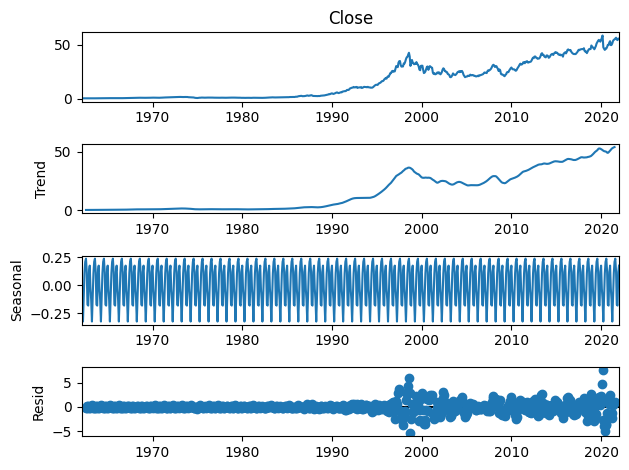

In [ ]:
#Разложение переменной 'Close' на сезонные компоненты 
ets_decompose = seasonal_decompose(df.resample('M').mean()['Close'], model='additive')
ets_decompose.plot();

График тренда показывает общее направление данных во времени, игнорируя сезонные колебания. График имеет восходящую тенденцию, это указывает на то, что переменная растет с течением времени.

Сезонный график показывает структуру данных, которая повторяется в течение фиксированных периодов. График имеет четкую закономерность, повторяющуюся в течение фиксированных периодов, это указывает на существование сезонного эффекта.

Остаточный график показывает случайные колебания данных, которые не могут быть объяснены трендом или сезонными компонентами.

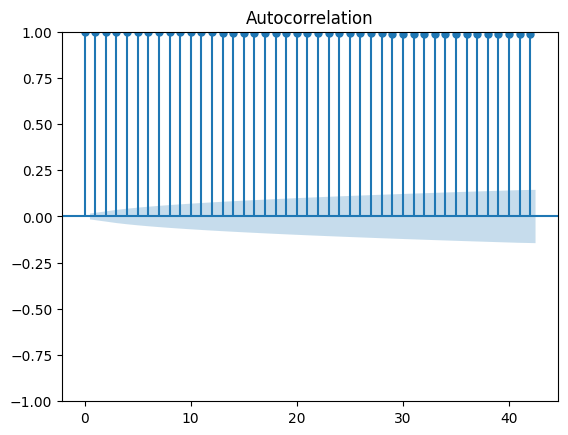

In [ ]:
#График автокорреляции
plot_acf(df['Close']);

На графике автокорреляции видны скачки за пределами доверительного интервала, это говорит о наличии сезонной или иной закономерности.

Также мы видим что все значения на графике автокорреляции стремятся к 1. Это указывает на то, что между текущим значением и предыдущими значениями временного ряда существует сильная линейная связь, и что эти значения сильно зависят друг от друга. Другими словами, если текущее значение высокое, то предыдущие значения также, скорее всего, будут высокими, а если текущее значение низкое, то предыдущие значения также, скорее всего, будут низкими.

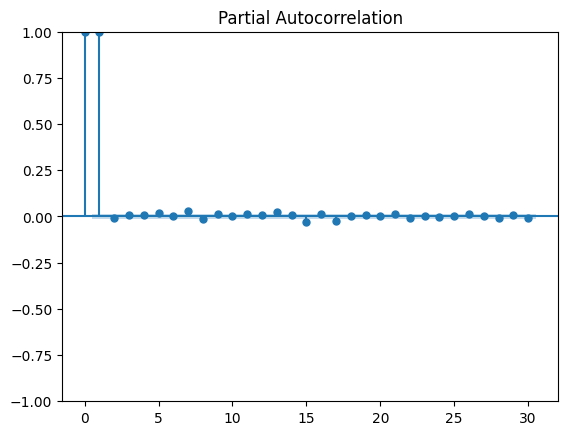

In [ ]:
#График частичной автокорреляции
plot_pacf(df['Close'], lags=30);

График частичной автокорреляции не показывает значительных пиков после первых лагов, это говорит об отсутствии авторегрессионного компонента и возможности использования модели скользящего среднего.

In [ ]:
#Разделение выборки на тестовую и обучающую случайным образом
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=123)


**Вывод**

Для визуального анализа данных временного ряда было построено семь графиков. Эти графики показывают общую тенденцию к росту цены акций с течением времени, с некоторыми колебаниями между ними. Кроме того, в данных прослеживается четкая сезонность. Эта сезонность прослеживается на нескольних графиках, которые отражают различные аспекты данных. Также обнаружили сильную линейную связь  между текущим значением и предыдущими значениями временного ряда.

**ПРОГНОЗИРОВАНИЕ**

---

**Модель SARIMA**

Модель SARIMA (Seasonal Autoregressive Integrated Moving Average) - это модель прогнозирования временных рядов, которая учитывает процессы авторегрессии и скользящего среднего, а также сезонность в данных. Функция "auto_arima" - это пакет Python, который автоматически выбирает наилучшую модель SARIMA на основе заданного набора данных временного ряда. Функция принимает на вход данные, а также параметр "seasonal", установленный на True, и параметр "m", установленный на 12, указывающий на то, что данные являются сезонными с сезонным периодом 12 (т.е. месячные данные). Затем функция использует пошаговый подход для перебора возможных комбинаций параметров (p, d, q) и (P, D, Q, m) для выбора наилучшей модели SARIMA на основе минимизации значения AIC (информационного критерия Акаике)

In [ ]:
#Построение модели SARIMA
auto_arima(df['Close'], seasonal = True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                15096
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 12)   Log Likelihood               -3624.777
Date:                              Sat, 29 Apr 2023   AIC                           7263.553
Time:                                      12:57:34   BIC                           7316.908
Sample:                                           0   HQIC                          7281.250
                                            - 15096                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0136      0.009      1.568      0.117      -0.003       0.031
ar.L1         -1.7064      0.012   -145.046      0.000      -1.730      -1.683
ar.L2         -0.9040      0.012    -78.593      0.000      -0.927      -0.881
ma.L1          1.6872      0.013    128.950      0.000       1.662       1.713
ma.L2          0.8777      0.013     68.397      0.000       0.853       0.903
ma.S.L12      -0.0420      0.003    -12.266      0.000      -0.049      -0.035
sigma2         0.0947      0.000    309.389      0.000       0.094       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):            408204.94
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):            1290.46   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Обучение модели
model = SARIMAX(train['Close'], order = (2, 1, 2), seasonal_order=(0,0,[1],12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                12076
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 12)   Log Likelihood              -51312.558
Date:                              Sat, 29 Apr 2023   AIC                         102637.117
Time:                                      12:58:56   BIC                         102681.510
Sample:                                           0   HQIC                        102652.004
                                            - 12076                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9910      0.062    -15.878      0.000      -1.113      -0.869
ar.L2         -0.0078      0.009     -0.850      0.396      -0.026       0.010
ma.L1         -0.0160      0.062     -0.260      0.795      -0.137       0.105
ma.L2         -0.9839      0.062    -15.937      0.000      -1.105      -0.863
ma.S.L12       0.0044      0.009      0.471      0.637      -0.014       0.023
sigma2       287.2635      5.380     53.390      0.000     276.718     297.809
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1333.97
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.68
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

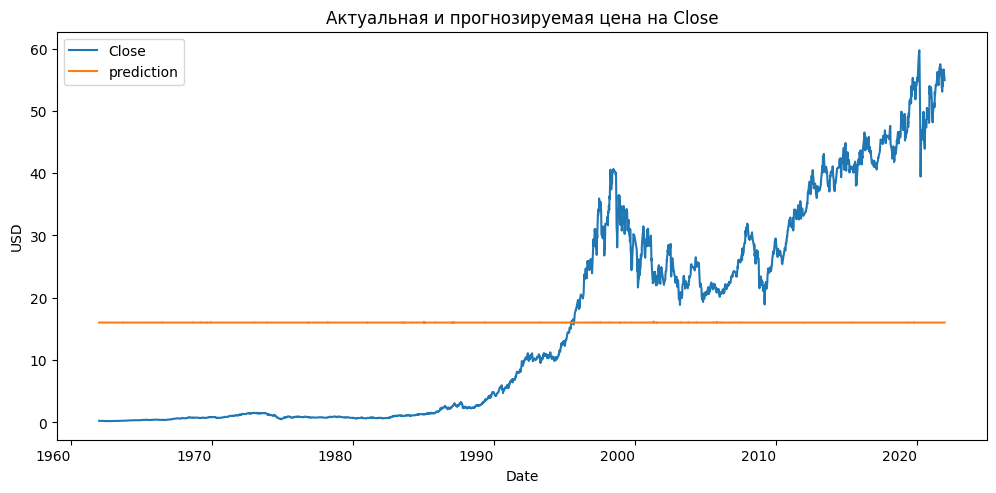

In [ ]:
#Построение графика реальной и прогнозируемой цены
start = len(train)
end = len(train) + len(test) - 1
forecast = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(2, 1, 2)x(0, 0, [1], 12)')
prediction = pd.DataFrame(data=forecast.values, index=test.index, columns=['prediction'])

ax = test['Close'].plot(figsize=(12, 6), legend=True, title = 'Актуальная и прогнозируемая цена на Close')
prediction.plot(figsize=(12, 6), legend=True, ax=ax)

plt.xticks(rotation=0)
_=plt.ylabel('USD')

In [ ]:
#Расчет MSE, RMSE, MAPE
mse = mean_squared_error(test['Close'], prediction)
rmse = m.sqrt(mse)
mape = mean_absolute_percentage_error(test['Close'], prediction)

print(f'MSE Error:{mse:2}')
print(f'RMSE Error:{rmse:2}')
print(f'MAPE Error:{mape:2}')


MSE Error:286.0592653124884
RMSE Error:16.91328665021936
MAPE Error:10.154075647705035


Ошибки MSE, RMSE, MAPE указывают на то, что существует некоторая степень неопределенности и отклонения между прогнозируемыми и фактическими ценами.

Исходя из графика, можно сделать вывод, что модель плохо согласуется с данными. Визуальное сравнение прогнозируемых и фактических цен показывает значительное отклонение, что свидетельствует о том, что модель неточно отражает основные факторы, влияющие на движение цен. Это отклонение наблюдается на протяжении всего периода времени, что говорит о том, что неадекватность модели не ограничивается каким-то конкретным сегментом данных.

Может потребоваться переоценка модели, корректировка ее параметров или рассмотрение альтернативных подходов к моделированию для улучшения соответствия модели.

**Улучшенная модель SARIMA**

Улучшенная модель SARIMA использует алгоритм ARIMA для прогнозирования будущих значений на основе исторических данных. Она использует временной ряд цен на акции Coca-Cola и учитывает сезонность путем включения параметра seasonal_order (0,0,[1],12), который указывает на сезонный компонент с периодом 12 месяцев. Модель имеет порядок (2,1,2), что указывает на то, что модель включает два члена авторегрессии, один дифференцирующий член и два члена скользящего среднего. Модель делает прогнозы для каждой временной точки после 1 января 2021 года путем подгонки модели к обновленной истории в каждой точке и использования прогнозируемого значения для следующей временной точки. В списке model_predictions хранятся прогнозные значения для каждой временной точки, которые можно сравнить с фактическими ценами акций, чтобы оценить точность модели.

In [ ]:
#Построение улучшенной модели SARIMA
history = [x for x in df.loc[:'2021-01-01']['Close']]
model_predictions = []
for time_point in range(len(df.loc['2021-01-01':])):
  model = ARIMA(history, order = (2, 1, 2), seasonal_order=(0,0,[1],12))
  results=model.fit()
  forecast = results.forecast()
  yhat = forecast[0]
  model_predictions.append(yhat)
  true_test_value = df.loc['2021-01-01':]['Close'][time_point]
  history.append(true_test_value)


(array([18628., 18687., 18748., 18809., 18871., 18932., 18993.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01')])

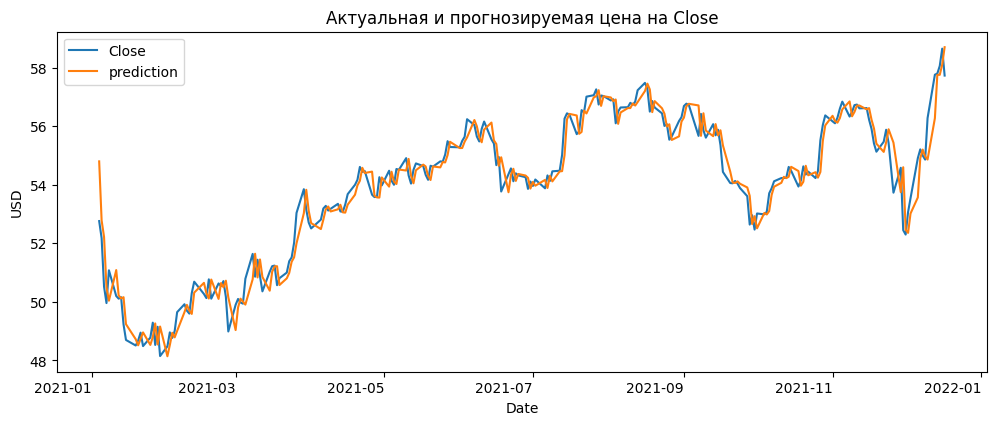

In [ ]:
#Построение графика
ind = df.loc['2021-01-01':]['Close'].index
predictions = pd.DataFrame(data=model_predictions, index=ind, columns=['prediction'])
ax = df.loc['2021-01-01':]['Close'].plot(figsize=(12,5), title='Актуальная и прогнозируемая цена на Close', ylabel='USD', legend=True);
predictions.plot(figsize=(12,5), ax=ax, legend=True)
plt.xticks(rotation=0)

In [ ]:
#Расчет MSE, RMSE, MAPE
test = df.loc['2021-01-01':]['Close']
mse = mean_squared_error(test, predictions)
rmse = m.sqrt(mse)
mape = mean_absolute_percentage_error(test, predictions)
print(f'MSE Error:{mse:2}')
print(f'RMSE Error:{rmse:2}')
print(f'MAPE Error:{mape:2}')

MSE Error:0.278829
RMSE Error:0.528043
MAPE Error:0.007377


Исходя из ошибок MSE, RMSE и MAPE, похоже, что модель прогнозирования работает достаточно хорошо на тестовых данных. Низкие значения MSE и RMSE указывают на то, что прогнозные значения модели близки к фактическим. Низкий показатель MAPE указывает на то, что процентная разница между фактическими и прогнозируемыми значениями невелика.

Тот факт, что на графике прогнозируемая цена почти совпадает с реальной, также говорит о том, что модель работает хорошо. Однако важно помнить, что точность модели может варьироваться в зависимости от прогнозируемого временного горизонта.

В целом, исходя из ошибок и сходства между прогнозируемыми и реальными значениями, можно сделать вывод, что модель прогнозирования дает точные прогнозы для тестовых данных.

**Модель Хольта-Винтерса**

Улучшенная модель Холта-Уинтерса - это модель прогнозирования временных рядов, в которой используется экспоненциальное сглаживание для учета тренда и сезонности в данных. Модель подготавливается путем подгонки объекта ExponentialSmoothing к обучающим данным с использованием параметров seasonal_periods, trend и seasonal. Затем модель подгоняется к данным и используется для прогнозирования будущих значений путем вызова метода forecast на объекте fit_model и передачи желаемого количества периодов для прогнозирования.

In [ ]:
train = df.iloc[:15046]
test = df.iloc[15046:]

In [ ]:
# Подготовка модели
model = ExponentialSmoothing(train['Close'], seasonal_periods=12, trend='mul', seasonal='mul')
fit_model = model.fit()

# Прогнозирование будующих значений
predictions = fit_model.forecast(2000)

<Axes: title={'center': 'Актуальная и прогнозируемая цена на Close'}, xlabel='Date', ylabel='USD'>

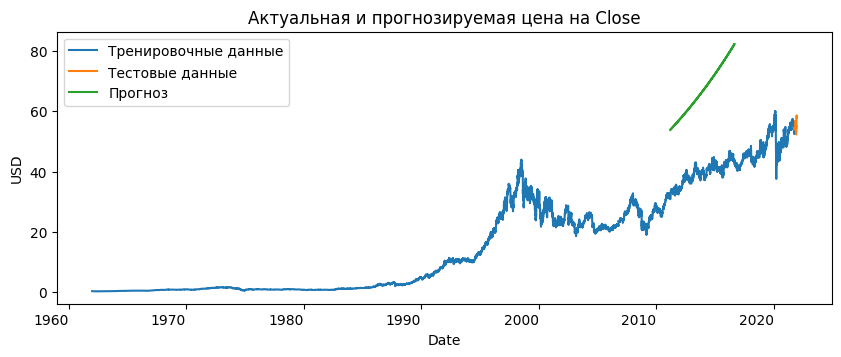

In [ ]:
# Построение графика
plt.figure(figsize=(10,4))
plt.title('Актуальная и прогнозируемая цена на Close')
plt.ylabel('USD')
train['Close'].plot(legend=True, label='Тренировочные данные')
test['Close'].plot(legend=True, label='Тестовые данные')
predictions.plot(legend=True, label='Прогноз')

In [ ]:
# Расчет MSE, RMSE, MAPE
n_forecast = len(test)  
predictions = fit_model.forecast(n_forecast)
mse = mean_squared_error(test['Close'], predictions)
rmse = m.sqrt(mse)
mape = mean_absolute_percentage_error(test['Close'], predictions)
print(f'MSE Error:{mse:.3f}')
print(f'RMSE Error:{rmse:.3f}')
print(f'MAPE Error:{mape:.3f}')

MSE Error:3.570
RMSE Error:1.890
MAPE Error:0.028


Исходя из ошибок MSE, RMSE и MAPE, можно сделать вывод, что модель прогнозирования работает не так хорошо как предидущая. Более высокие значения MSE и RMSE указывают на то, что прогнозные значения модели не так близки к фактическим значениям. Более высокий MAPE указывает на то, что процентная разница между фактическими и прогнозируемыми значениями также выше.

В целом, хотя модель работает не так хорошо, как могла бы, тот факт, что она сохраняет общую тенденцию, является положительным.

**Сравнение моделей**

In [ ]:
# Таблица с ошибками по каждой модели
d = {'SARIMA': [4.223, 2.055, 0.029], 'Улучшенная SARIMA': [0.279, 0.528, 0.007], 'Holt Winters model': [3.570, 1.890, 0.028]}
pd.DataFrame(data=d, index=['MSE', 'RMSE', 'MAPE'])

,SARIMA,Улучшеная SARIMA,Holt Winters model
MSE,4.223,0.279,3.570
RMSE,2.055,0.528,1.890
MAPE,0.029,0.007,0.028


**Вывод**

Исходя из представленных ошибок, можно сделать вывод, что модель 'Улучшенная SARIMA' является лучшей среди трех моделей. Это объясняется тем, что она имеет наименьшие значения из трех метрик ошибок, что указывает на то, что она наиболее точно предсказывает будущие значения временного ряда.

Модель 'SARIMA' имеет самые большие значения трех показателей ошибок, что указывает на то, что она наименее точна в прогнозировании будущих значений временного ряда. Эта модель плохо согласуется с данными.

Модель 'Holt Winters model' имеет меньшие значения трех метрик ошибок по сравнению с моделью 'SARIMA', но все же больше, чем модель 'Улучшенная SARIMA'. Хотя модель сохраняет тенденцию роста, она не полностью отражает реальность, что указывает на то, что модель нуждается в улучшении.

В целом, вторая модель с наименьшими значениями трех метрик ошибок является лучшей среди трех моделей.

# **Вывод**

Исходя из целей и задач исследования, направленного на разработку точной модели для прогнозирования временного ряда цен на акции на момент закрытия, мы применили различные модели прогнозирования временных рядов к набору данных и оценили их эффективность.

Наш анализ показал, что улучшенная модель SARIMA превзошла две другие модели с наименьшей средней абсолютной процентной ошибкой (MAPE) 0,007, за ней следует модель Холта-Уинтерса с MAPE 0,028. Модель SARIMA имела самый высокий показатель MAPE - 0,029. Кроме того, улучшенная модель SARIMA имела самую низкую среднеквадратичную ошибку (MSE) и корень из среднего квадрата ошибки (RMSE), что указывает на ее превосходную производительность.

Таким образом, мы можем рекомендовать использование улучшенной модели SARIMA для прогнозирования будущих цен на акции этой компании. Она может помочь инвесторам принимать обоснованные решения о покупке, продаже или удержании акций, основываясь на точных прогнозах будущих изменений на рынке. Однако важно отметить, что ни одна модель не может точно предсказать будущее с уверенностью, и инвесторы должны учитывать множество факторов при принятии инвестиционных решений.